Importar bibliotecas

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

Carregar dados

In [70]:
dataset= pd.read_csv('aapl.csv')

In [71]:
dataset.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.341274,1296484000
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.065081,1609364400


Adicionar coluna com o calculo da media entre 'Low' e 'High'

In [72]:
dataset['Mean'] = (dataset['Low'] + dataset['High'])/2
dataset.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.341274,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.065081,1609364400,3.728393


In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
 7   Mean       2768 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 173.1+ KB


In [74]:
steps=-1
dataset_for_prediction= dataset.copy()
dataset_for_prediction['Actual']=dataset_for_prediction['Mean'].shift(steps)
dataset_for_prediction.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.341274,1296484000,3.924107,3.728393
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.065081,1609364400,3.728393,3.591964
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.972301,2294398400,3.591964,3.327143


Deletar colunas com valores nulos

In [75]:
dataset_for_prediction=dataset_for_prediction.dropna()

Criar data como index do DataFrame

In [76]:
dataset_for_prediction['Date'] =pd.to_datetime(dataset_for_prediction['Date'])
dataset_for_prediction.index= dataset_for_prediction['Date']

Gerar gráficos

Text(0.5, 1.0, ' Tyson Opening Stock Value ')

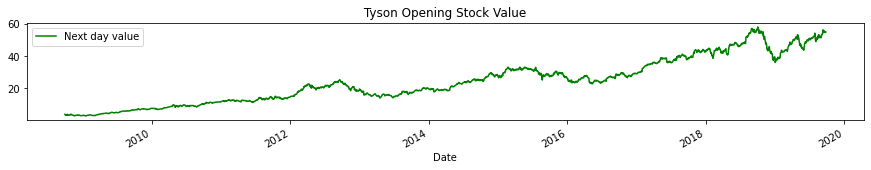

In [77]:
dataset_for_prediction['Mean'].plot(color='green', figsize=(15,2))
plt.legend(['Next day value', 'Mean'])
plt.title(' Tyson Opening Stock Value ')

Text(0.5, 1.0, ' Apple Stock Volume')

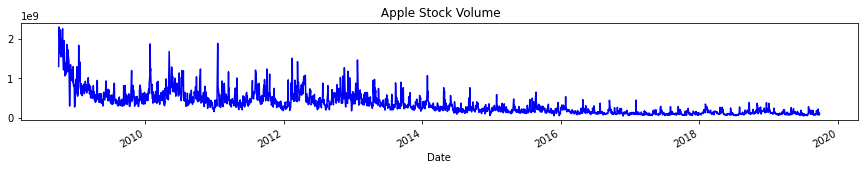

In [78]:
dataset_for_prediction['Volume'].plot(color='blue', figsize=(15,2))
plt.title(" Apple Stock Volume")

Normalizar os dados

In [79]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[['Low', 'High','Open', 'Close', 'Volume', 'Adj Close', 'Mean']])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

In [80]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[['Actual']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [81]:
X.rename(columns={0:'Low', 1:'High', 2:'Open', 3:'Close', 4:'Volume', 5:'Adj Close', 6:'Mean'}, inplace=True)
X.head(2)

,Low,High,Open,Close,Volume,Adj Close,Mean
0,0.019075,0.019558,0.021177,0.019996,0.556275,0.01762,0.019318
1,0.014246,0.017258,0.018632,0.014163,0.695398,0.01248,0.015763


In [82]:
y.rename(columns={0:'Stock Price next day'}, inplace= True)
#y.index=dataset_for_prediction.index
y.head(2)

,Stock Price next day
0,0.015763
1,0.013284


Dividir os dados em treinamento e teste

In [83]:
train_size=int(len(dataset) *0.7)
test_size = int(len(dataset)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

Decompor a serie

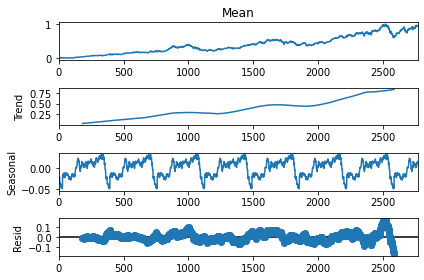

In [84]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X['Mean'],model='add',period=365);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

Checar a estacionaridade com o teste Dickey-Fuller Aumentado (ADF)

In [85]:
y_test=y['Stock Price next day'][:train_size].dropna()

In [86]:
dfout={}
dftest=sm.tsa.adfuller(y_test.dropna(), autolag='AIC', regression='ct')

In [87]:
for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", " Stock Price")
else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", " Stock Price")

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for  Stock Price


In [88]:
dfout={}
dftest=sm.tsa.adfuller(y_test.diff().dropna(), autolag='AIC', regression='ct')

In [89]:
for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", " Stock Price")
else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", " Stock Price")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary  Stock Price


Construir o modelo

C:\Users\55839\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


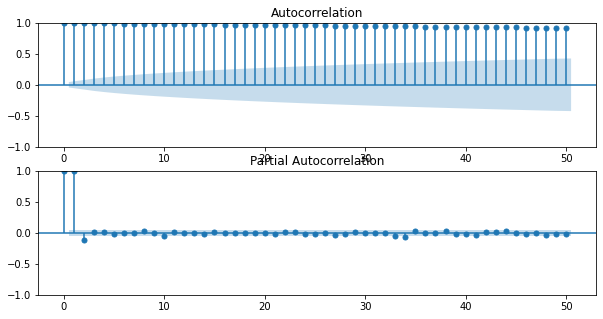

In [90]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [91]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
 exogenous= train_X,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15584.602, Time=3.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15557.800, Time=0.58 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15572.033, Time=2.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15637.032, Time=3.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15557.478, Time=1.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15569.580, Time=2.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15567.723, Time=1.77 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15563.539, Time=1.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 15.801 seconds


In [92]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1937
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7828.516
Date:                Thu, 09 Dec 2021   AIC                         -15637.032
Time:                        09:02:18   BIC                         -15581.349
Sample:                             0   HQIC                        -15616.553
                               - 1937                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.448e-05      5e-05      1.291      0.197   -3.34e-05       0.000
Low           -0.0028      0.027     -0.102      0.919      -0.056       0.050
High          -0.0487      0.030     -1.647      0.100      -0.107       0.009
Open          -0.1455      0.030     -4.845      0.000      -0.204      -0.087
Close          0.8732      0.314      2.781      0.005       0.258       1.489
Volume         0.0010      0.001      0.695      0.487      -0.002       0.004
Adj Close      0.0007      0.331      0.002      0.998      -0.647       0.648
Mean          -0.0259      0.021     -1.221      0.222      -0.067       0.016
ma.L1         -0.5375      0.048    -11.196      0.000      -0.632      -0.443
sigma2      1.797e-05    2.2e-07     81.579      0.000    1.75e-05    1.84e-05
===================================================================================
Ljung-Box (L1) (Q):                   4.42   Jarque-Bera (JB):             17160.68
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               7.45   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.21e+18. Standard errors may be unstable.
"""

Treinar o modelo

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(train_y, exog=train_X, order=(0,1,1), enforce_invertibility=False, enforce_stationarity=False)

Ajuste

In [94]:
results= model.fit()

C:\Users\55839\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predizer os resultados

In [95]:
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)

In [96]:
predictions

1937    0.389724
1938    0.390722
1939    0.389074
1940    0.391280
1941    0.381160
          ...   
2762    0.924008
2763    0.918638
2764    0.934721
2765    0.929196
2766    0.923763
Name: predicted_mean, Length: 830, dtype: float64

In [62]:
forecast_1= results.forecast(steps=test_size-1, exog=test_X)

In [97]:
forecast_1

1937    0.389724
1938    0.390722
1939    0.389074
1940    0.391280
1941    0.381160
          ...   
2762    0.924008
2763    0.918638
2764    0.934721
2765    0.929196
2766    0.923763
Name: predicted_mean, Length: 830, dtype: float64

In [98]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])
act

,Stock Price next day
1937,0.391368
1938,0.391844
1939,0.388166
1940,0.383919
1941,0.383124
...,...
2762,0.946476
2763,0.944114
2764,0.946681
2765,0.943206


In [99]:
predictions=pd.DataFrame(predictions)
predictions

,predicted_mean
1937,0.389724
1938,0.390722
1939,0.389074
1940,0.391280
1941,0.381160
...,...
2762,0.924008
2763,0.918638
2764,0.934721
2765,0.929196


In [100]:
predictions.reset_index(drop=True, inplace=True)
predictions

,predicted_mean
0,0.389724
1,0.390722
2,0.389074
3,0.391280
4,0.381160
...,...
825,0.924008
826,0.918638
827,0.934721
828,0.929196


In [101]:
predictions.index=test_X.index
predictions

,predicted_mean
1937,0.389724
1938,0.390722
1939,0.389074
1940,0.391280
1941,0.381160
...,...
2762,0.924008
2763,0.918638
2764,0.934721
2765,0.929196


In [102]:
predictions['Actual'] = act['Stock Price next day']
predictions.rename(columns={0:'Pred'}, inplace=True)
predictions

,predicted_mean,Actual
1937,0.389724,0.391368
1938,0.390722,0.391844
1939,0.389074,0.388166
1940,0.391280,0.383919
1941,0.381160,0.383124
...,...,...
2762,0.924008,0.946476
2763,0.918638,0.944114
2764,0.934721,0.946681
2765,0.929196,0.943206


<AxesSubplot:>

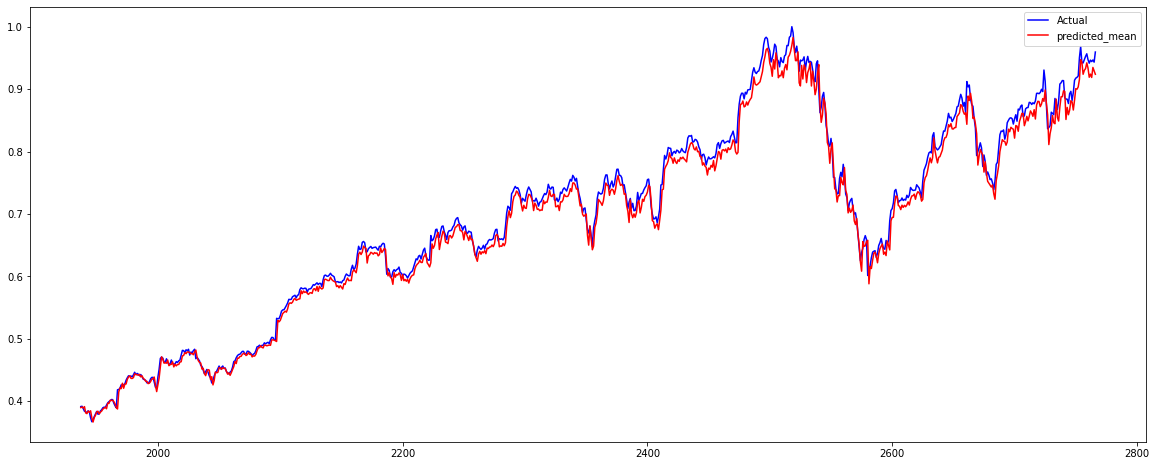

In [103]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['predicted_mean'].plot(legend=True, color='red', figsize=(20,8))

In [106]:
forecast_apple= pd.DataFrame(forecast_1)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index=test_X.index
forecast_apple['Actual'] =scaler_output.iloc[train_size:, 0]
forecast_apple.rename(columns={0:'Forecast'}, inplace=True)

<AxesSubplot:>

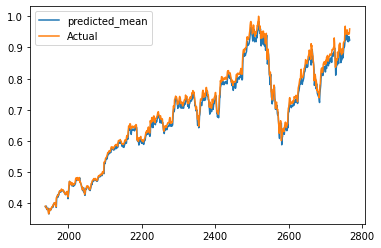

In [110]:
forecast_apple['predicted_mean'].plot(legend=True)
forecast_apple['Actual'].plot(legend=True)

In [109]:
forecast_apple

,predicted_mean,Actual
1937,0.389724,0.391368
1938,0.390722,0.391844
1939,0.389074,0.388166
1940,0.391280,0.383919
1941,0.381160,0.383124
...,...,...
2762,0.924008,0.946476
2763,0.918638,0.944114
2764,0.934721,0.946681
2765,0.929196,0.943206
